## Dataset 1 : AirBnB Open Data from Seattle
###### Problem to solve is Regression
********

## Converting all 3 csv files to dataframes

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, ImageColorGenerator
from langdetect import detect

nltk.download('vader_lexicon')
sb.set()
pd.set_option('display.max_columns', 500)   
# pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/caeden/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [4]:
calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [5]:
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [6]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

# Cleaning up data 
* Removing all dollar signs
* Converting date to date time 
* Tabulating the number of nulls in the dataset



In [7]:
# Calendar df
calendar.price = calendar.price.replace('[\$,]', '', regex=True).astype(float)
calendar.date = pd.to_datetime(calendar.date)

# Listings df
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)
listings.extra_people = listings.extra_people.replace('[\$,]', '', regex=True).astype(float)
listings.cleaning_fee = listings.cleaning_fee.replace('[\$,]', '', regex=True).astype(float)
listings.security_deposit = listings.security_deposit.replace('[\$,]', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.astype(str).str.replace('%','').astype(float)
listings.host_response_rate = listings.host_response_rate.astype(str).str.replace('%','').astype(float)
listings.host_since = pd.to_datetime(listings.host_since)

# reviews df
reviews.date = pd.to_datetime(reviews.date)


In [8]:
# count the number of Null in each column for listing dataframe
listings.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

counts
license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
neighbourhood                   416
xl_picture_url                  320
medium_url                      320
thumbnail_url                   320
host_neighbourhood              300
summary                         177
bathrooms                        16
host_location                     8
zipcode                           7
bedrooms                          6
host_has_profile_pic              2
host_total_listings_count         2
host_listings_count               2
host_picture_url                  2
host_thumbnail_url                2
host_is_superhost                 2
host_since                        2
host_name                         2
host_identity_verified            2
beds                              1
property_type                     1

In [9]:
# count the number of Null in each column for reviews dataframe
reviews.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

counts
comments      18

In [10]:
# count the number of Null in each column for calendar dataframe
calendar.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

counts
price  459028

# Basic Data Visualisation / Data Analysis
1. Using GeoPandas to visualise the location of the Airbnb around Seattle
2. Bar Graph to show number of airbnb per neighbourhood & avg price per neighbourhood
3. Graph to show how price / number of bookings fluctuate throughout the year
4. Visualisation of the number of ammenities that a listing can have 
5. Graph to show how price differ for different property type / apartment type
6. Sentiment analysis of airbnb reviews
7. Graph of number of listings from 2008 - 2015
-------------------

# 1. Using GeoPandas to visualise the location of the Airbnb around Seattle
Can comment this out because it is extremely slow

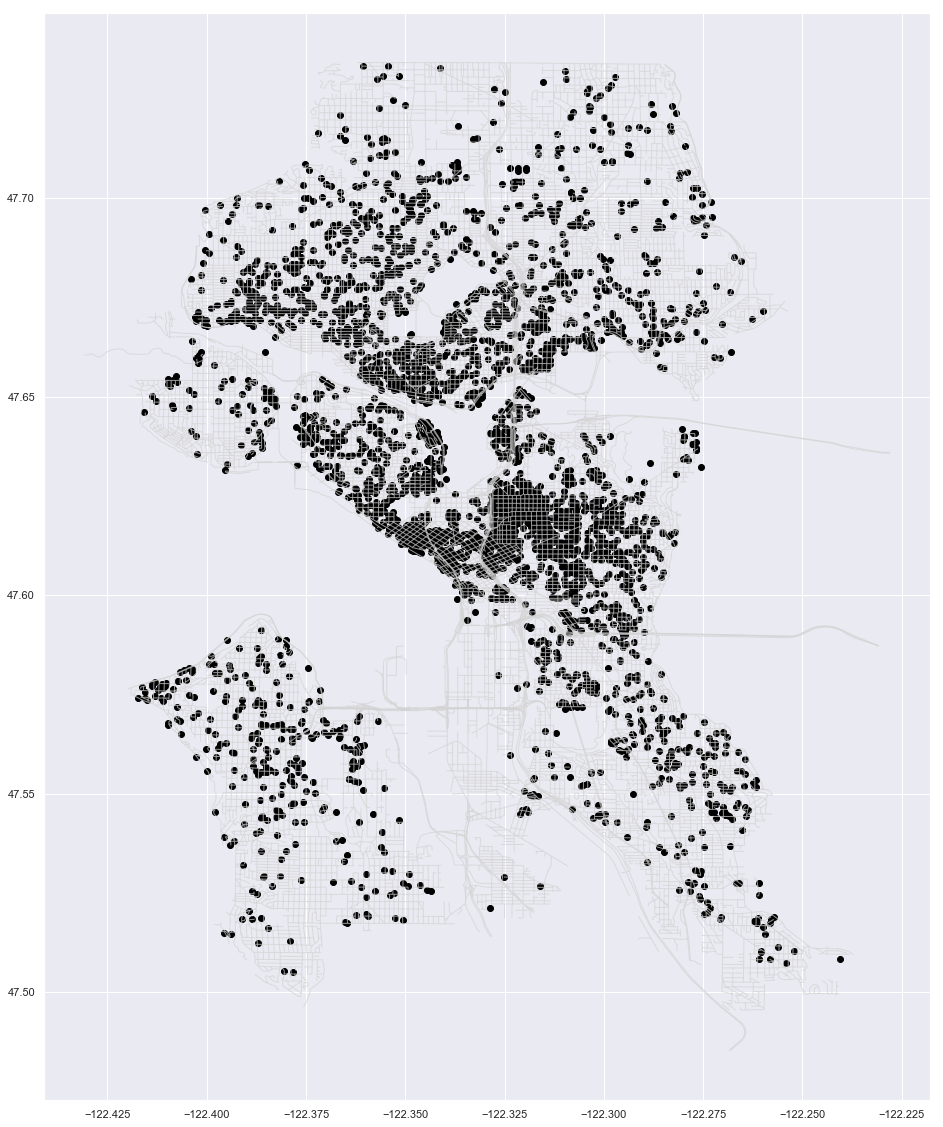

In [11]:
# create a geo panda dataframe  
listings_duplicate = listings.copy()
# change combined _listings to listings_duplicate 
gdf = gpd.GeoDataFrame(listings_duplicate,geometry=gpd.points_from_xy(listings_duplicate['longitude'],listings_duplicate['latitude']))
# reading seattle's street/map data
df_seattle = gpd.read_file('https://opendata.arcgis.com/datasets/383027d103f042499693da22d72d10e3_0.geojson')

fig,ax = plt.subplots(figsize=(30,20))    
# plotting seattle's street/map
df_seattle.plot(color='lightgrey',linewidth=1,alpha=0.7,ax=ax)
# plotting the location of the airbnbs
gdf.plot(color='black',ax=ax)

Most of the airbnbs are clustered in the middle of Seattle

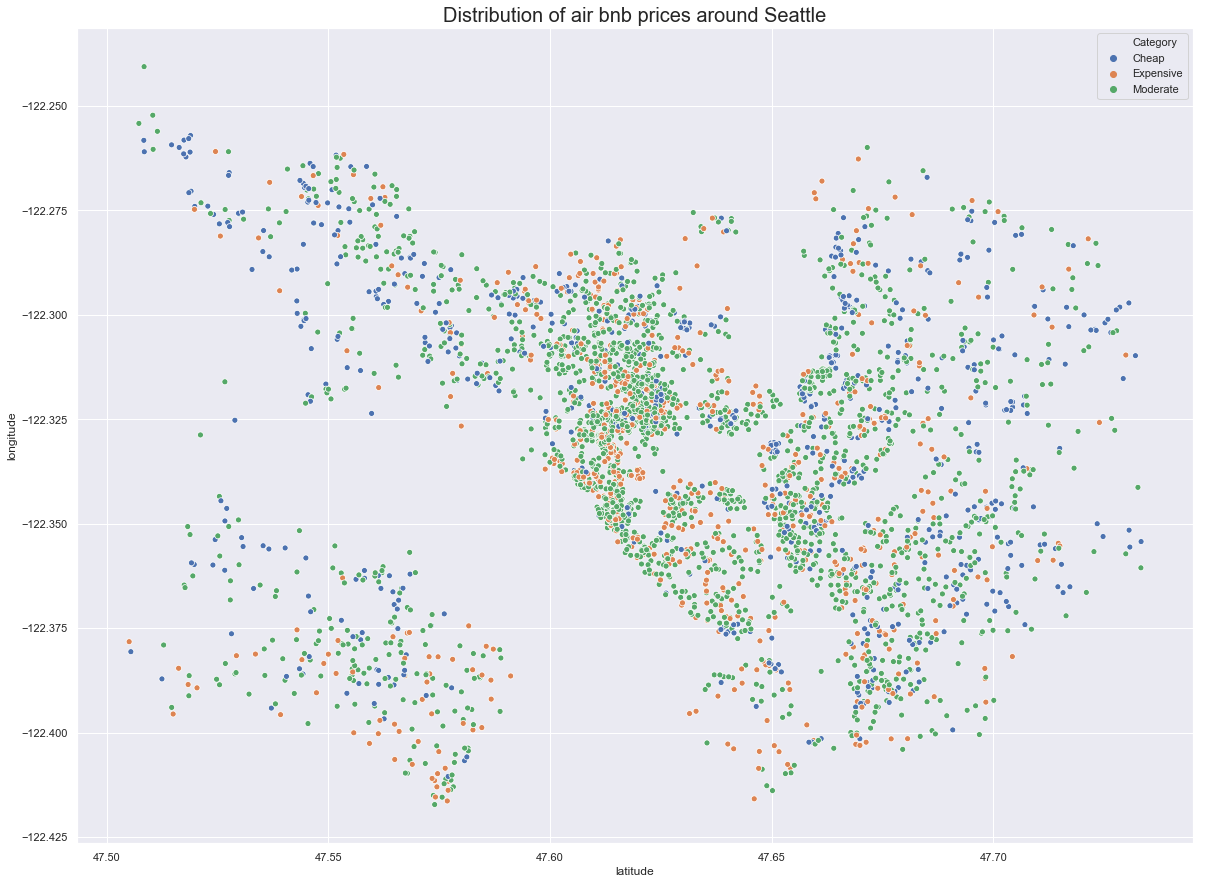

In [12]:
quartile_80 = listings_duplicate['price'].quantile(0.8)
quartile_20 = listings_duplicate['price'].quantile(0.2)

listings_duplicate.loc[listings_duplicate['price'] > quartile_80 , 'Category' ] = 'Expensive' 
listings_duplicate.loc[listings_duplicate['price'] < quartile_20 , 'Category' ] = 'Cheap' 
listings_duplicate.loc[(listings_duplicate['price'] > quartile_20 ) & (listings_duplicate['price'] < quartile_80), 'Category' ] = 'Moderate' 
listings_duplicate['Category'] = listings_duplicate['Category'].astype('category')


fig,ax = plt.subplots(figsize=(20,15))
plt.title('Distribution of air bnb prices around Seattle', fontsize=20)
sb.scatterplot(x="latitude", y="longitude", hue="Category",data=listings_duplicate)

# 2. Number of AirBnb per neighbourhood

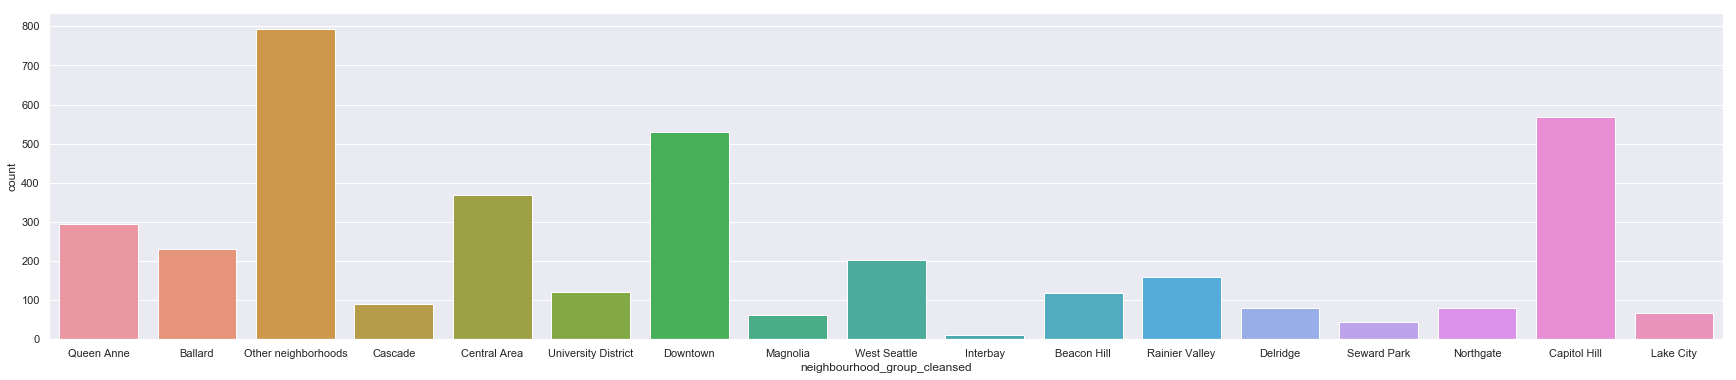

In [13]:
plt.figure(figsize=(30, 6))
sb.countplot(listings["neighbourhood_group_cleansed"])

# 3. Average Price per neighbourhood

In [14]:



listings.neighbourhood_group_cleansed=listings.neighbourhood_group_cleansed.astype('category')


# Plot the price distribution for different neighbourhoods
listings_filtered = pd.DataFrame(listings[["price", "neighbourhood_group_cleansed"]])
price_distribution=pd.pivot_table(listings_filtered,
                                  values = ['price'],
                                  index=['neighbourhood_group_cleansed'] ,
                                  aggfunc = {'price':np.mean})
# count distribution
count_distribution=listings_filtered.groupby('neighbourhood_group_cleansed').count().rename(columns = {'price':'Number of Listings'})

# merge both dataframe together
count_distribution.reset_index()
price_distribution.reset_index()
price_and_count_distribution=count_distribution.merge(price_distribution,left_on='neighbourhood_group_cleansed',right_on='neighbourhood_group_cleansed')
price_and_count_distribution.rename(columns ={'price':'Average Price/day'}).sort_values(by=['Average Price/day'],ascending=False)

Number of Listings  Average Price/day
neighbourhood_group_cleansed                                       
Magnolia                                      61         177.672131
Queen Anne                                   295         157.223729
Downtown                                     530         154.405660
West Seattle                                 203         141.359606
Cascade                                       89         140.101124
Capitol Hill                                 567         130.592593
Central Area                                 369         128.338753
Ballard                                      230         124.682609
Other neighborhoods                          794         119.968514
Interbay                                      11         109.727273
Seward Park                                   44         108.477273
Beacon Hill                                  118          94.669492
University District                          122          93.639344
Lake City                                     67          92.671642
Rainier Valley                               159          91.899371
Northgate                                     80          88.550000
Delridge                                      79          83.278481

# 4 . Visualisation of the number of ammenities that a listing can have

In [15]:
listings['no_of_amenities']= listings.apply(lambda row : len(row.amenities.split(',')) ,axis=1)
listings[['amenities','no_of_amenities']].head()

amenities  no_of_amenities
0  {TV,"Cable TV",Internet,"Wireless Internet","A...               10
1  {TV,Internet,"Wireless Internet",Kitchen,"Free...               16
2  {TV,"Cable TV",Internet,"Wireless Internet","A...               21
3  {Internet,"Wireless Internet",Kitchen,"Indoor ...               14
4  {TV,"Cable TV",Internet,"Wireless Internet",Ki...               13

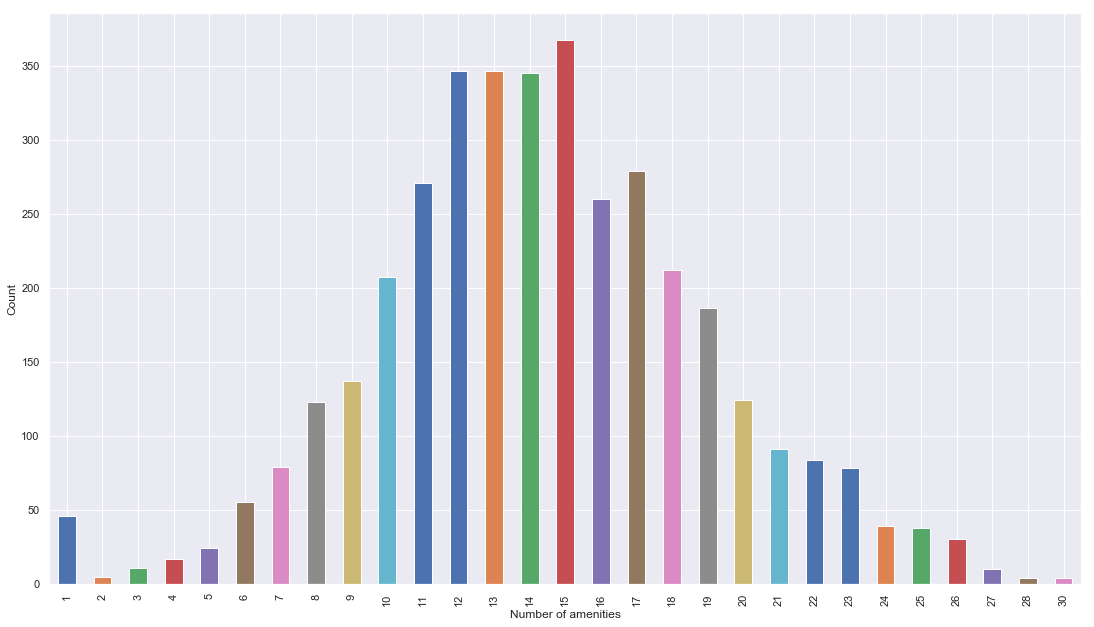

In [16]:
listings['no_of_amenities'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Number of amenities')
plt.ylabel('Count')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [17]:
# create a duplicate copy so that we will not affect the original copy
listings_dup = listings[['neighbourhood_group_cleansed','no_of_amenities']].copy()

ammenities_distribution = listings_dup.groupby('neighbourhood_group_cleansed').agg({'no_of_amenities':'mean'}).reset_index()

#merging price_and_count_distribution & ammenities_distribution 
price_and_count_distribution.reset_index()
combined_distribution=ammenities_distribution.merge(price_and_count_distribution,left_on='neighbourhood_group_cleansed',right_on='neighbourhood_group_cleansed')
combined_distribution.head()

neighbourhood_group_cleansed  no_of_amenities  Number of Listings  \
0                      Ballard        13.821739                 230   
1                  Beacon Hill        13.898305                 118   
2                 Capitol Hill        13.007055                 567   
3                      Cascade        13.966292                  89   
4                 Central Area        13.878049                 369   

        price  
0  124.682609  
1   94.669492  
2  130.592593  
3  140.101124  
4  128.338753

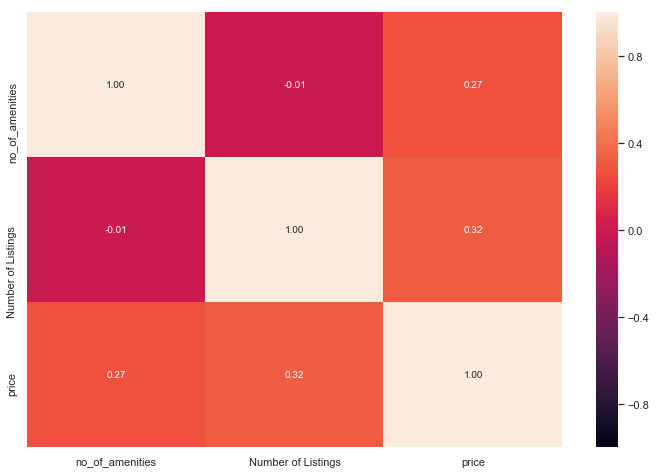

In [18]:
plt.figure(figsize = (12,8))
sb.heatmap(combined_distribution.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

There seems to be correlation between price , number of amenities and number of listings

# 5. Graph to show how  price & booking fluctuate throughout the year
1)Graph for **average price** against **time**

2)Graph for **number of bookings** against **time**

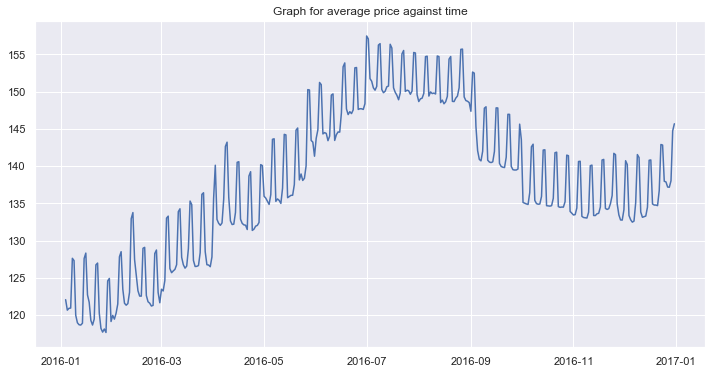

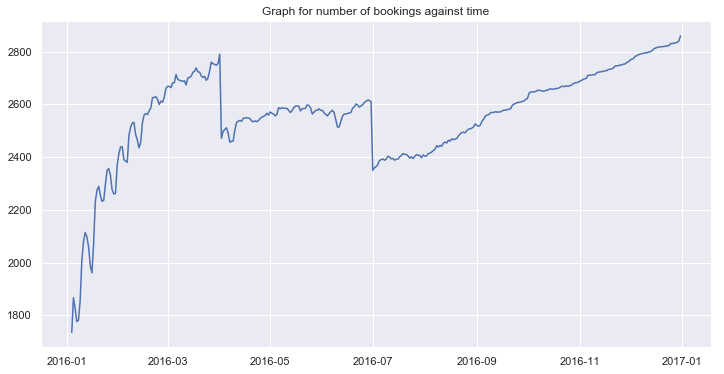

In [19]:
# from pandas.tseries import converter
# converter.register()

# Graph for average price against time
calendar_filtered1 = calendar.dropna()
# only consider 2016 data
calendar_filtered1=calendar_filtered1[calendar_filtered1['date'].dt.year==int(2016)]
calendar_filtered1=calendar_filtered1.drop('listing_id',axis=1).groupby(['date']).mean()
calendar_filtered1.reset_index(inplace=True)
# calendar_filtered1['date'] = pd.to_datetime(calendar_filtered1['date'])

plt.figure(figsize=(12,6))
plt.title('Graph for average price against time')
plt.plot(calendar_filtered1['date'], calendar_filtered1['price'])


# Graph for number of bookings against time
# assumption remove available = f from calculation
calendar_filtered2 = calendar.dropna()
# only consider 2016 data
calendar_filtered2=calendar_filtered2[calendar_filtered2['date'].dt.year==int(2016)]
calendar_filtered2=calendar_filtered2.groupby(['date']).size().reset_index(name='counts')
calendar_filtered2['date'] = pd.to_datetime(calendar_filtered2['date'])


plt.figure(figsize=(12,6))
plt.title('Graph for number of bookings against time')
plt.plot(calendar_filtered2['date'], calendar_filtered2['counts'])



The number of booking peaks towards the end of the year as well as during April, to maximise profits the host should raise prices during this 2 period

# 6. Graph to show how price differ for different property / apartment type

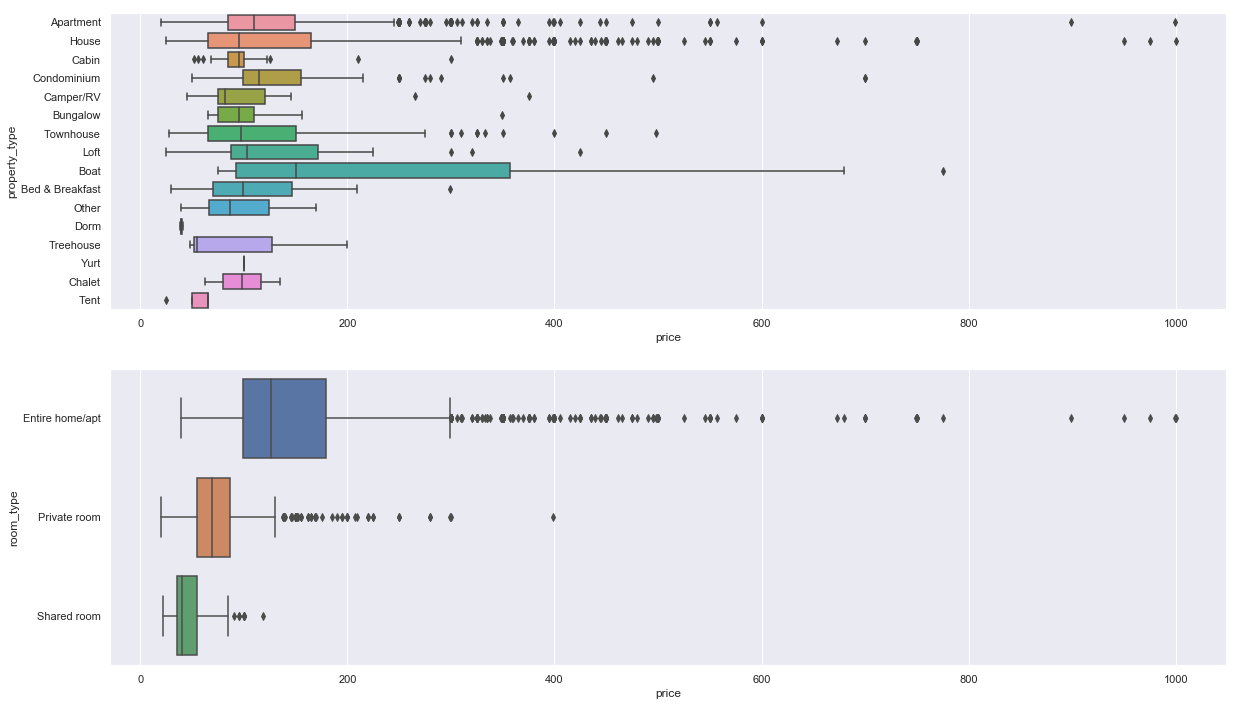

In [20]:
f, axes = plt.subplots(2, 1, figsize=(20,12))
sb.boxplot(x = listings.price , y = listings.property_type , data = listings , orient = "h" , ax = axes[0])
sb.boxplot(x = listings.price , y = listings.room_type , data = listings , orient = "h" , ax=axes[1])

* Property Type = Apartment & House have the most outliers
* Room Type = Entire Room has the most outliers and are generally more expensive

# 6. Sentiment analysis of airbnb reviews

In [21]:
df_comments = reviews[['listing_id', 'comments','id']].copy().rename(columns = {'id':'comment_id'})
df_neighbourhood = listings[['id','neighbourhood_cleansed']]


def getNeighborhood(listing_id):
    neighbourhood = listings.loc[listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

df_comments.dropna(inplace = True)  #drop all empty rows
df_comments['neighbourhood'] = df_comments['listing_id'].apply(getNeighborhood)
df_comments

listing_id                                           comments  \
0         7202016  Cute and cozy place. Perfect location to every...   
1         7202016  Kelly has a great room in a very central locat...   
2         7202016  Very spacious apartment, and in a great neighb...   
3         7202016  Close to Seattle Center and all it has to offe...   
4         7202016  Kelly was a great host and very accommodating ...   
5         7202016  Kelly was great, place was great, just what I ...   
6         7202016  Kelly was great! Very nice and the neighborhoo...   
7         7202016  hola all bnb erz - Just left Seattle where I h...   
8         7202016  Kelly's place is conveniently located on a qui...   
9         7202016  The place was really nice, clean, and the most...   
10        7202016  The place was really nice, clean and quiet at ...   
11        7202016  The listing was exactly as described!  Kelly's...   
12        7202016  Very welcoming and a nicer place to live in th...   
13        7202016  Great location, great price, great host! Thank...   
14        7202016  Staying at Kelly's was easy. The location was ...   
15        7202016  Kelly was an amazing host who made the stay ve...   
16        3946674  Despite our late booking request, Rachel & Jon...   
17        3946674  Rachel & Jon have a nice house closed to downt...   
18        3946674  Rachel and Jon have been the perfect hosts for...   
19        3946674  This house was a delightful bright place to st...   
20        3946674  Beautiful place, nice neighborhood and lovely ...   
21        3946674  Super cozy home. Located near some good restau...   
22        3946674  Cute house, and Rachel and Jon were super nice...   
23        3946674  Rachel and Jon were really great hosts. Warm, ...   
24        3946674  The house was easy to locate and the arrangeme...   
25        3946674  Rachel and Jon were very obliging hosts, super...   
26        3946674  What a great stay at Rachel and Jon's! They we...   
27        3946674  We had an amazing time and felt very welcome i...   
28        3946674  It was very easy to get in touch with Rachel t...   
29        3946674  Rachel and Jon's home is beautiful and inspiri...   
...           ...                                                ...   
84819     3424991  I had a good experience staying with Michael a...   
84820     3424991  This was a great place to stay.  First off it ...   
84821     3424991  Awesome location and price. The apartment was ...   
84822     3424991               Nice neighbourhood and warm welcome.   
84823     3424991  Great location. I was a little scared to enter...   
84824     3424991  My boyfriend and I had a great experience stay...   
84825     3424991  Had a great stay. Michael and Leah  made it re...   
84826     3424991  We had a good stay at Michael. He and Leah pro...   
84827     3424991  In big city, it is very hard to find a clean r...   
84828     1179538  I was searching for a place last minute for my...   
84829     1179538              Very nice apartment, clean and quite.   
84830     3624990  The location is super convenient to the state ...   
84831     3624990  This apartment is in a great location - easy w...   
84832     3624990  Absolutely perfect stay! Doug & Rebecca were s...   
84833     3624990  Excellent room, very attentive property manage...   
84834     3624990  Great, clean place in a perfect location for a...   
84835     3624990  What an amazing place to stay in Seattle! A fe...   
84836     3624990  We had an excellent stay at Seattle Suites! Th...   
84837     3624990  The apartment was clean and accurate to the de...   
84838     3624990  We were warmly greeted by Doug at the time agr...   
84839     3624990  The apartment was clean, tidy and as described...   
84840     3624990  We were with 7 people in rebecca's two 2-bed a...   
84841     3624990  Great place in the middle of the city. Easy to...   
84842     3624990  We loved how close it was to

In [22]:
def sentiment_analyzer_scores(comment):
    sentence = str(comment)
    score = analyser.polarity_scores(comment)
    return score['compound']

analyser = SentimentIntensityAnalyzer()
df_comments['polarity'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.sort_values(by=['polarity'],ascending=True,inplace = True)

df_comments.sample(10)

listing_id                                           comments  \
65674     6515046  Really nice apartement: a lot of space, nice r...   
16122      910784  Walking into Brian & Nate's was quintessential...   
18323     2686659  Traci was a great host! This was our first vis...   
35088     8355276  We loved our time in Seattle! Rilwan was very ...   
72167     2391699  I felt very welcomed and the room was perfect ...   
67316     1472532  Sid's apartment was exactly as advertised, cle...   
23443     6278191  Fabulous location. Very clean and nicely prese...   
3774      4236723  What a perfect place to stay the night! This c...   
11597     1080097  I've stayed in the room for one month.\r\n\r\n...   
6116      4022127  Francesco's apartment was as described. We sta...   

       comment_id   neighbourhood  polarity  
65674    37694747   North Admiral    0.9647  
16122    15858516            Mann    0.9792  
18323    50196136     Mount Baker    0.9813  
35088    57429700  Yesler Terrace    0.8161  
72167    21045709         Fremont    0.7501  
67316    38862752        Belltown    0.8550  
23443    46717955        Belltown    0.9659  
3774     58359760           Adams    0.9895  
11597    26353095  Pioneer Square    0.9764  
6116     27401191            Alki    0.9097

Due to certain limitation in the SentimentIntensityAnalyzer library , reviews writen in foreign languages tend to have a lower polarity score.

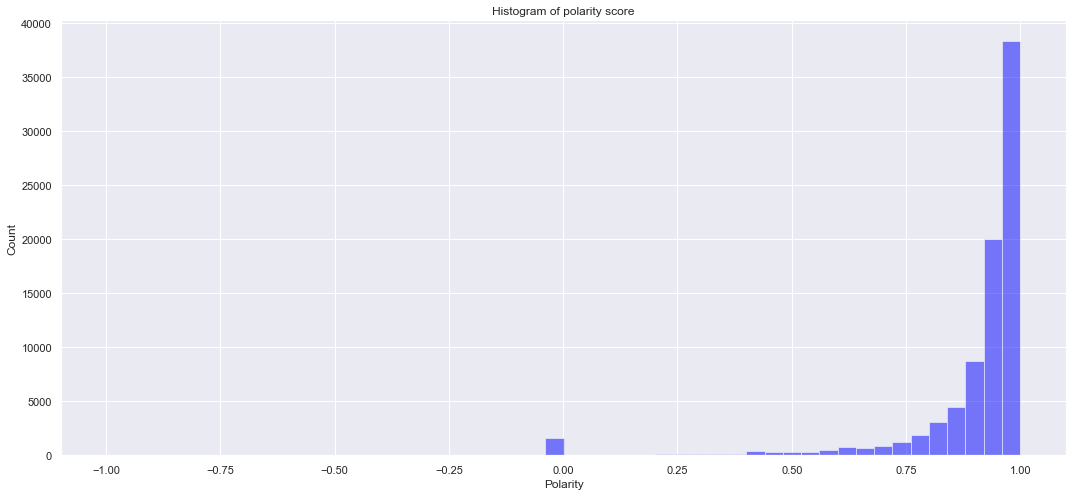

In [23]:
# A histogram of the polarity scores (to show the spread of polarity scores)
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(df_comments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity score')
plt.show()

In [24]:
print('The mean polarity score is = ' + str(df_comments.polarity.describe().iloc[1]))
print('The median polarity score is = ' + str(df_comments.polarity.describe().iloc[5]))

The mean polarity score is = 0.8849848817059635
The median polarity score is = 0.9541


Most reviews have a positive score , with a significant number close to 1.

In [25]:
polarity_per_listing_id=df_comments.groupby('listing_id',as_index=False)['polarity'].mean()
polarity_per_listing_id.sort_values(by=['polarity'],ascending=True,inplace = True)
polarity_per_listing_id.sample(5)

listing_id  polarity
3172     9823290  0.876400
601      1790020  0.849254
35         47196  0.834767
107       215882  0.915297
249       637710  0.809480

In [26]:
print('Positive scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] > 0].count())
print('Negative scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] < 0].count())
print('Neutral scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] == 0].count())

Positive scores:  3165
Negative scores:  5
Neutral scores:  21


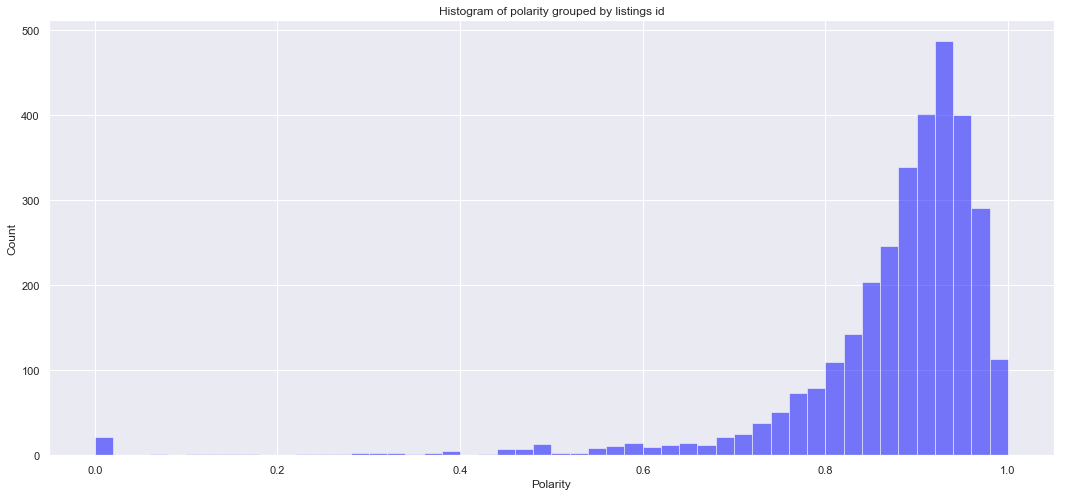

listing_id  polarity
3065     9183838   -0.9863
2867     8474294   -0.9783
475      1343805   -0.4497
2602     7873208   -0.3382
2519     7732071   -0.0467

In [27]:
# A histogram of the polarity scores grouped by listing_id
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(polarity_per_listing_id.polarity, num_bins, facecolor='blue', alpha=0.5, range = [0, 1.0])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity grouped by listings id')
plt.show()
polarity_per_listing_id.head()

In [28]:
print('The mean polarity score is ' + str(polarity_per_listing_id.polarity.describe().iloc[1]))
print('The median polarity score is ' + str(polarity_per_listing_id.polarity.describe().iloc[5]))

The mean polarity score is 0.8701993312493541
The median polarity score is 0.9046691176470587


When the polarity scores are grouped by listing_id there is a slight left shift in the graph , this implies that there are once in a while there are negative reviews to pull the average polarity score for eact listing_id.

In [29]:


# to improve the speed of the code
# we will scale down the dataframe
df_comments_sample = df_comments.sample(3000)

for index, row in df_comments_sample['comments'].iteritems():
    try:
        lang = detect(row) # detecting each row
        df_comments_sample.loc[index, 'language_used'] = lang
    except:
        df_comments_sample.loc[index, 'language_used'] = 'Error'
        
df_comments_sample.language_used.unique()

array(['en', 'fr', 'es', 'af', 'zh-cn', 'ko', 'de', 'da', 'ca', 'nl',
       'sv', 'so', 'ru'], dtype=object)

In [30]:
df_comments_sample_by_language_count = df_comments_sample.groupby(['language_used']).size().reset_index(name = 'count')
df_comments_sample_by_language_count.sort_values(by = 'count' , ascending = False)

language_used  count
4             en   2964
6             fr      9
3             de      8
12         zh-cn      6
0             af      2
5             es      2
7             ko      2
8             nl      2
1             ca      1
2             da      1
9             ru      1
10            so      1
11            sv      1

Most reviews are writen in English , there is also a small portion of reviews writen in laguages such as French and Spanish. 

In [31]:
df_comments_sample_average_polarity = pd.DataFrame(df_comments_sample.groupby(['language_used'])['polarity'].mean())
df_comments_sample_average_polarity.sort_values(by = 'polarity' , ascending = False)

polarity
language_used          
en             0.892329
da             0.807400
af             0.635100
sv             0.455900
so             0.440400
fr             0.200678
es             0.170000
ko             0.000000
nl             0.000000
ru             0.000000
zh-cn          0.000000
ca            -0.296000
de            -0.607225

Reviews writen in English tend to have a higher polarity score . Whereas , reviews writen in other laguages tend to have a lower polarity . Futhermore , some languages like zh-cn (Chinese) have a score of 0 .This could be due to certain limitations in the SentimentIntensityAnalyzer library 

<Figure size 720x432 with 0 Axes>

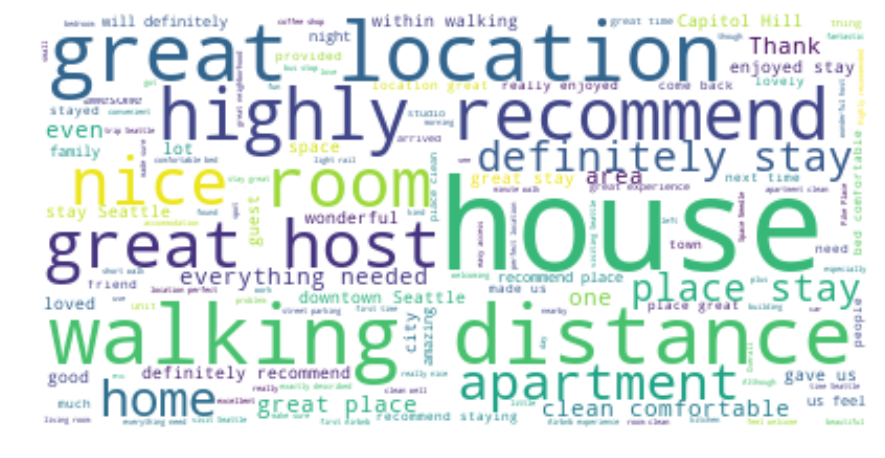

In [32]:
# Cutting the dataframe by half will make the function run faster
filtered_reviews = reviews.sample(40000)
concatenatedReviews = " ".join(str(row) for row in filtered_reviews['comments'])
# # Generate a word cloud image:
wordCloud = WordCloud(max_words=200, background_color="white").generate(concatenatedReviews)

plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

plt.imshow(wordCloud, interpolation='Bilinear')
plt.axis("off")
plt.show()


# 7. Graph of number of listings from 2008 - 2015

In [33]:
listings_duplicate["host_since_year"] = listings_duplicate["host_since"].dt.year
listings_duplicate_filtered = listings_duplicate[['host_since','host_since_year']]
listings_duplicate_filtered = listings_duplicate_filtered.groupby(['host_since_year']).size().reset_index(name = 'count')
listings_duplicate_filtered["total listings"] = listings_duplicate_filtered['count'].cumsum()
listings_duplicate_filtered

host_since_year  count  total listings
0           2008.0      4               4
1           2009.0     64              68
2           2010.0    149             217
3           2011.0    398             615
4           2012.0    539            1154
5           2013.0    776            1930
6           2014.0    900            2830
7           2015.0    981            3811
8           2016.0      5            3816

Text(0,0.5,'Number')

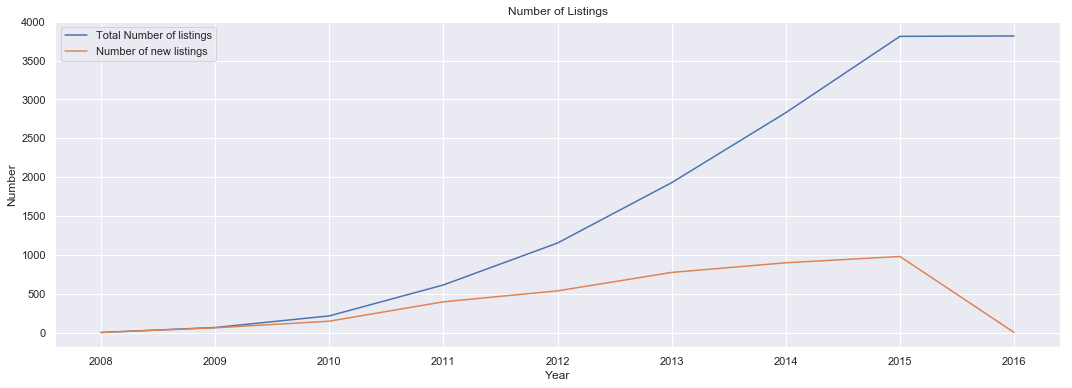

In [34]:
plt.figure(figsize=(18, 6))
plt.title('Number of Listings')
sb.lineplot(x="host_since_year", y="total listings", data=listings_duplicate_filtered, label="Total Number of listings")
sb.lineplot(x="host_since_year", y="count", data=listings_duplicate_filtered , label="Number of new listings")
plt.xlabel("Year")
plt.ylabel("Number")

# Linear Regression
-----

In [35]:
from sklearn.linear_model import LinearRegression

#### Price's correlation with other variable

In [36]:
filtered_listings = listings.select_dtypes(include =['float64','int64']) 
to_drop = ['id','scrape_id','host_id','latitude','longitude','license']
filtered_listings = filtered_listings.drop(to_drop,axis=1)
filtered_listings.corr()['price'].sort_values()

reviews_per_month                -0.218588
number_of_reviews                -0.124695
availability_90                  -0.058810
calculated_host_listings_count   -0.054092
availability_60                  -0.049336
review_scores_value              -0.041776
availability_30                  -0.037653
availability_365                 -0.015550
host_response_rate               -0.014071
maximum_nights                   -0.003336
host_acceptance_rate              0.005900
review_scores_checkin             0.007877
review_scores_communication       0.012990
minimum_nights                    0.017297
review_scores_accuracy            0.019026
review_scores_cleanliness         0.054357
review_scores_rating              0.055551
review_scores_location            0.075069
host_listings_count               0.093962
host_total_listings_count         0.093962
extra_people                      0.127961
no_of_amenities                   0.184176
security_deposit                  0.373195
guests_incl

In [37]:
X = listings[['accommodates', 'bedrooms', 'beds']]
Y = listings['price']

X_train = X.iloc[0:2864]
Y_train = Y.iloc[0:2864]
X_test = X.iloc[2865:]
Y_test = Y.iloc[2865:]

In [38]:
X_train = X_train.replace(np.nan, 0)
X_test = X_test.replace(np.nan, 0)

In [39]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  22.38148085080121
Coefficients of Regression 	: a =  [20.02167837 29.86496639 -0.31040688]



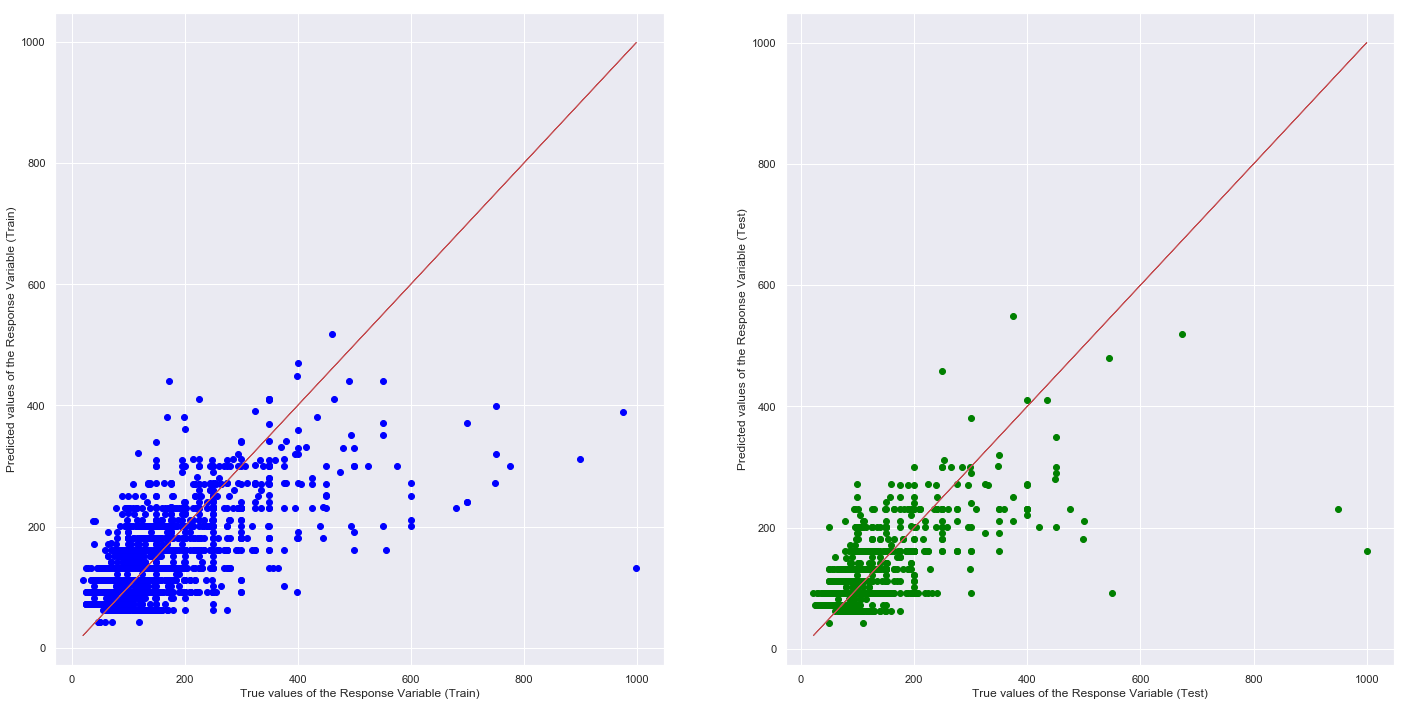

In [41]:
# Predict Response corresponding to Predictors
price_train_pred = linreg.predict(X_train)
price_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, price_train_pred, color = "blue")
axes[0].plot(Y_train, Y_train, 'w-', linewidth = 1, color = 'r')
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, price_test_pred, color = "green")
axes[1].plot(Y_test, Y_test, 'w-', linewidth = 1, color = 'r')
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()




In [64]:
# Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))





In [65]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, price_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, price_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47265993214644864
Mean Squared Error (MSE) 	: 4320.416119810561

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4337057264279427
Mean Squared Error (MSE) 	: 4517.968723520009



In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

In [85]:
X = listings[['accommodates', 'bedrooms', 'beds']]
listings.columns.get_loc("weekly_price")

58

In [ ]:
extra_people                      0.127961
no_of_amenities                   0.184176
security_deposit                  0.373195
guests_included                   0.392875
bathrooms                         0.516424
square_feet                       0.531752
beds                              0.589525
bedrooms                          0.627720
accommodates                      0.652218
cleaning_fee                      0.656938
monthly_price                     0.873450
weekly_price     

In [86]:
array = listings.values

col_idx = np.array([50, 52, 53,63,92,60,62,51,56,61,57])
data = array[:, col_idx]

In [87]:
data = data.astype(float)

In [88]:
data = data[~np.isnan(data).any(axis=1)]

In [89]:
scaler = Normalizer().fit(data)
normalizedData = scaler.transform(data)

In [116]:

X = data[:1000,:10]
Y = data[:1000,10]
kfold = KFold(n_splits=5,random_state=2222)
model = LinearRegression()

In [76]:
normalizedData


array([[0.04700031, 0.01175008, 0.01175008, 0.99875665],
       [0.02665601, 0.006664  , 0.006664  , 0.99960024],
       [0.01128089, 0.00512768, 0.00717875, 0.99989745],
       ...,
       [0.02149792, 0.01074896, 0.01074896, 0.99965332],
       [0.02019687, 0.        , 0.01009843, 0.99974502],
       [0.03445091, 0.02296727, 0.01148364, 0.99907646]])

In [117]:

results = cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 62.293% (19.054%)


In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [135]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(20, input_dim=10, activation='relu')) 
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model

In [125]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)

In [136]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5,
    verbose=0)))
pipeline = Pipeline(estimators)

In [137]:
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -16348.10 (13167.16) MSE
